In [1]:
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score

train_data   = pd.read_csv('../../data/data-science-london-scikit-learn/train.csv',header = None)
train_labels = pd.read_csv('../../data/data-science-london-scikit-learn/trainLabels.csv',header = None)
test_data    = pd.read_csv('../../data/data-science-london-scikit-learn/test.csv',header = None)

In [2]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, train_labels, test_size = 0.30, random_state = 101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((700, 40), (300, 40), (700, 1), (300, 1))

In [4]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver = 'saga')
lr_model.fit(x_train, y_train.values.ravel())
lr_predicted = lr_model.predict(x_test)
print('Logistic Regression', accuracy_score(y_test, lr_predicted))

Logistic Regression 0.82


In [5]:
test_pred = lr_model.predict(test_data)
pred_df = pd.DataFrame(test_pred)
pred_df.index += 1
pred_df.columns = ['Solution']
pred_df['Id'] = np.arange(1, pred_df.shape[0] + 1)
pred_df = pred_df[['Id', 'Solution']]

pred_df.to_csv('Submission.csv',index=False)

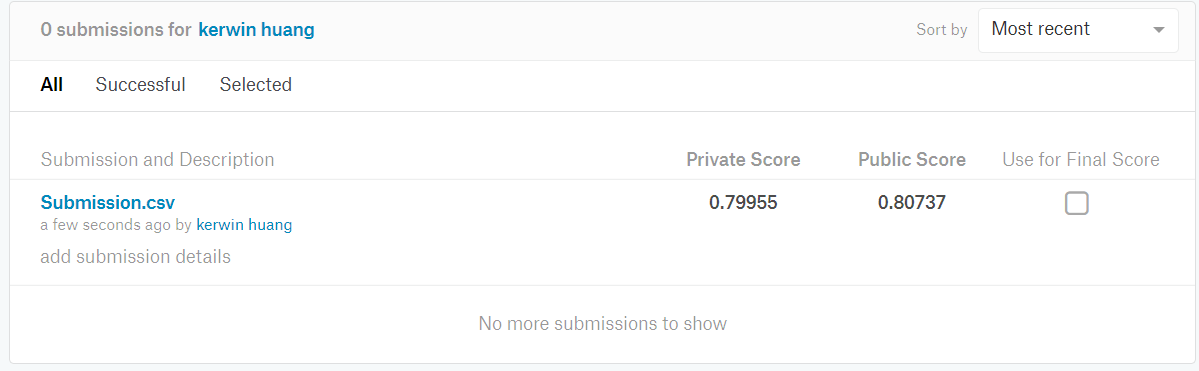